# Imports

In [1]:
import os
import h5py
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

# Setup

In [2]:
basePath = os.path.join('results', 'polish_rho_rho_sof')
fromArchive = False

basePath = os.path.join('results', 'mo_fixed2')
fromArchive = True

In [3]:
if fromArchive:
    archive = pickle.load(open(os.path.join(basePath, 'archive.pkl'), 'rb'))
    tree = pickle.load(open(os.path.join(basePath, 'tree.pkl'), 'rb'))
    
    treeName = 'add(inv(mul(sqrt(rho), rho)), rho)'
    entry = archive[treeName]
    tree.bestParams = entry.bestParams
    
    errors = entry.bestErrors
else:
    files = sorted(glob.glob(os.path.join(basePath, 'tree*')))
    intIndices = [int(s[s.find('tree')+5:s.find('.pkl')]) for s in files]

    argsort = np.argsort(intIndices)

    treeFile = np.array(files)[argsort][-1]
    tree = pickle.load(open(treeFile, 'rb'))
    
    errorFiles = sorted(glob.glob(os.path.join(basePath, 'errors*')))
    errorFile  = np.array(errorFiles)[argsort][-1]
    errors = pickle.load(open(errorFile, 'rb'))

In [4]:
print('Tree:', tree)

Tree: add(inv(mul(sqrt(rho), rho)), rho)


In [5]:
dct = tree.parseArr2Dict(np.atleast_2d(tree.bestParams))

# Plotting

In [6]:
def plotSpline(x, y, bc):
    cs = CubicSpline(x, y, bc_type=((1, bc[0]), (1, bc[1])))
    
    plotX = np.linspace(x[0], x[-1], 100)
    plotY = cs(plotX)
    
    return plotX, plotY

In [20]:
tree.bestParams

array([-6.21293265e-01, -2.07365159e+00,  6.66602178e-01,  8.51166704e-01,
        3.57899206e-01, -3.01383711e+00, -1.82545668e+00, -1.20330035e+00,
       -2.90579179e+00, -2.89131128e+00,  3.27622930e-01, -1.92756349e+00,
       -1.70778057e+00,  1.36024085e+00, -1.44956524e-03, -2.34759972e-01,
       -1.69261897e-01, -6.70094960e-04, -1.64488015e-03, -4.07166199e-03,
       -1.25500061e+00])

In [28]:
params = tree.bestParams

dummy = np.zeros(27)
dummy[0:6]   = params[0:6];   dummy[7]  = params[6]
dummy[9:15]  = params[7:13];  dummy[16] = params[13]
dummy[18:24] = params[14:20]; dummy[25] = params[20]

In [29]:
splits = []

for svNode in tree.svNodes:
    for comp in svNode.components:
        splits.append(svNode.numParams[comp]+2)

In [30]:
splitParams = np.array_split(dummy, np.cumsum(splits)[:-1])

In [31]:
splitParams

[array([-0.62129326, -2.07365159,  0.66660218,  0.8511667 ,  0.35789921,
        -3.01383711,  0.        , -1.82545668,  0.        ]),
 array([-1.20330035, -2.90579179, -2.89131128,  0.32762293, -1.92756349,
        -1.70778057,  0.        ,  1.36024085,  0.        ]),
 array([-1.44956524e-03, -2.34759972e-01, -1.69261897e-01, -6.70094960e-04,
        -1.64488015e-03, -4.07166199e-03,  0.00000000e+00, -1.25500061e+00,
         0.00000000e+00])]

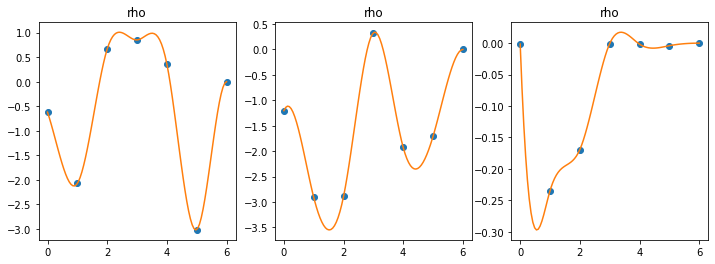

In [32]:
numRows = max(1, len(splitParams)//3)

fig, axes = plt.subplots(numRows, 3, figsize=(12, 4*numRows))

for i, spline in enumerate(splitParams):
    y, bc = spline[:-2], spline[-2:]
    x = np.arange(len(y))
    
    plotX, plotY = plotSpline(x, y, bc)
    
    row = i//3
    col = i%3
    
    if numRows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    ax.plot(x, y, 'o')
    ax.plot(plotX, plotY)
    ax.set_title(tree.svNodes[i].description)

In [35]:
y1, bc = splitParams[0][:-2], splitParams[0][-2:]
x = np.arange(len(y))

plotX1, plotY1 = plotSpline(x, y1, bc)

y2, bc = splitParams[1][:-2], splitParams[1][-2:]
x = np.arange(len(y))

plotX2, plotY2 = plotSpline(x, y2, bc)

In [38]:
plotY1

array([-0.62129326, -0.73750576, -0.86308242, -0.99533325, -1.13156823,
       -1.26909738, -1.40523067, -1.53727812, -1.6625497 , -1.77835542,
       -1.88200527, -1.97080925, -2.04207736, -2.09311958, -2.12124591,
       -2.12376635, -2.0979909 , -2.04135781, -1.95425545, -1.8400223 ,
       -1.70212508, -1.54403055, -1.36920543, -1.18111647, -0.9832304 ,
       -0.77901397, -0.57193391, -0.36545695, -0.16304984,  0.03182069,
        0.21568789,  0.38508503,  0.53654537,  0.66660218,  0.77272707,
        0.85614513,  0.91901979,  0.96351449,  0.99179267,  1.00601778,
        1.00835324,  1.00096249,  0.98600899,  0.96565616,  0.94206744,
        0.91740627,  0.8938361 ,  0.87352036,  0.85862249,  0.85130592,
        0.85363322,  0.8653467 ,  0.88386842,  0.90651956,  0.9306213 ,
        0.95349483,  0.97246132,  0.98484195,  0.98795792,  0.97913039,
        0.95568055,  0.91492959,  0.85419868,  0.770809  ,  0.66208175,
        0.52533809,  0.35789921,  0.15846818, -0.06872439, -0.31

In [39]:
plotY2

array([-1.20330035, -1.14053643, -1.11494809, -1.12327397, -1.16225268,
       -1.22862287, -1.31912315, -1.43049216, -1.55946852, -1.70279086,
       -1.8571978 , -2.01942799, -2.18622004, -2.35431258, -2.52044424,
       -2.68135365, -2.83377944, -2.97451378, -3.1015806 , -3.21423553,
       -3.3117878 , -3.39354659, -3.45882112, -3.50692058, -3.53715418,
       -3.54883112, -3.5412606 , -3.51375183, -3.46561401, -3.39615635,
       -3.30468804, -3.19051829, -3.0529563 , -2.89131128, -2.70568052,
       -2.4993137 , -2.2762486 , -2.04052299, -1.79617465, -1.54724134,
       -1.29776085, -1.05177094, -0.81330939, -0.58641398, -0.37512247,
       -0.18347265, -0.01550228,  0.12475086,  0.23324899,  0.30595435,
        0.33899387,  0.33228296,  0.28952548,  0.21459001,  0.11134514,
       -0.01634056, -0.1645985 , -0.3295601 , -0.50735678, -0.69411997,
       -0.88598107, -1.07907152, -1.26952272, -1.4534661 , -1.62703307,
       -1.78635506, -1.92756349, -2.04757106, -2.14641567, -2.22

In [43]:
from gplearn.functions import _function_map as _gp_function_map
from gplearn.functions import _Function as _gp_Function


_protected_sqrt = _gp_function_map['sqrt'].function
_protected_log  = _gp_function_map['log'].function
_protected_inverse = _gp_function_map['inv'].function

In [46]:
_protected_inverse(_protected_sqrt(np.abs(plotY1))*plotY2)

array([-1.05433259e+00, -1.02095860e+00, -9.65426501e-01, -8.92339362e-01,
       -8.08833385e-01, -7.22493479e-01, -6.39500439e-01, -5.63817169e-01,
       -4.97320166e-01, -4.40381848e-01, -3.92492553e-01, -3.52735632e-01,
       -3.20088473e-01, -2.93588376e-01, -2.72412729e-01, -2.55913110e-01,
       -2.43630780e-01, -2.35301366e-01, -2.30635557e-01, -2.29356345e-01,
       -2.31441781e-01, -2.37147330e-01, -2.47079999e-01, -2.62378175e-01,
       -2.85113880e-01, -3.19258188e-01, -3.73395596e-01, -4.70772193e-01,
       -7.14594421e-01, -1.65065974e+00, -6.51563358e-01, -5.05080317e-01,
       -4.47173631e-01, -4.23615445e-01, -4.20446190e-01, -4.32419764e-01,
       -4.58266253e-01, -4.99263000e-01, -5.59037563e-01, -6.44375637e-01,
       -7.67359695e-01, -9.50320135e-01, -1.23823700e+00, -1.73533941e+00,
       -2.74653996e+00, -5.69046581e+00, -6.82300156e+01,  8.57669458e+00,
        4.62678263e+00,  3.54242402e+00,  3.19280580e+00,  3.23516819e+00,
        3.67383297e+00,  

(-10.0, 10.0)

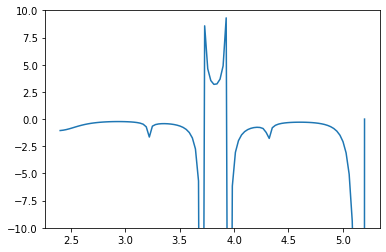

In [50]:
fig, ax = plt.subplots()
# add(inv(mul(sqrt(rho), rho)), rho)
x = np.linspace(2.4, 5.2, 100)
ax.plot(x, _protected_inverse(_protected_sqrt(np.abs(plotY1))*plotY2))
ax.set_ylim([-10, 10])

# Errors

## Directly from logs

In [21]:
np.sum(errors)

73.76369303323091

In [22]:
with h5py.File('../svreg_data/mlearn/Mo/Mo.hdf5', 'r') as db:
        
    print(
        '{:>45} average errors || {:.6f} {:.6f}\n'.format(
            str(tree),
            np.average(errors[::2]),
            np.average(errors[1::2]),
        )
    )
    
    print(
        '{:>60} || {} {}'.format(
            'structName',
            '(eV/atom)',
            '(eV/A)'
        )
    )
    
    for i, structName in enumerate(sorted(db)):
        print(
            '{:>60} || {:.6f} {:.6f}'.format(
                structName,
                errors[2*i],
                errors[2*i+1]
            )
        )

           add(inv(mul(sqrt(rho), rho)), rho) average errors || 0.017935 0.362291

                                                  structName || (eV/atom) (eV/A)
                                        Ground_state_crystal || 0.000000 0.030118
                         Mo_3x3x3_cell_mode_1_strain_-0.0200 || 0.000502 0.029291
                         Mo_3x3x3_cell_mode_1_strain_-0.0400 || 0.009943 0.031129
                         Mo_3x3x3_cell_mode_1_strain_-0.0600 || 0.030745 0.040471
                         Mo_3x3x3_cell_mode_1_strain_-0.0800 || 0.063464 0.039306
                         Mo_3x3x3_cell_mode_1_strain_-0.1000 || 0.110907 0.044043
                          Mo_3x3x3_cell_mode_1_strain_0.0200 || 0.004936 0.029686
                          Mo_3x3x3_cell_mode_1_strain_0.0800 || 0.031994 0.027190
                         Mo_3x3x3_cell_mode_2_strain_-0.0200 || 0.000413 0.024685
                         Mo_3x3x3_cell_mode_2_strain_-0.0400 || 0.009990 0.035146
                

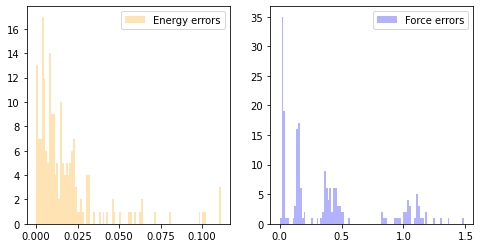

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(errors[::2] , bins=100, alpha=0.3, label='Energy errors', color='orange')
ax[1].hist(errors[1::2], bins=100, alpha=0.3, label='Force errors', color='blue')

ax[0].legend()
ax[1].legend()

## External validation

In [33]:
from mpi4py import MPI

from settings import Settings
from database import SVDatabase
from evaluator import SVEvaluator

settingsPath = 'examples/settings.in'
databasePath = '../svreg_data/mlearn/Mo/Mo.hdf5'

settings = Settings.from_file(settingsPath)
settings['PROCS_PER_PHYS_NODE'] = 1
settings['PROCS_PER_MANAGER'] = 1

worldComm = MPI.COMM_WORLD
with SVDatabase(settings['databasePath'], 'r') as database:
    structNames = list(database.keys())

    if settings['refStruct'] not in structNames:
        raise RuntimeError(
            "The reference structure must be included in structNames."
        )

    evaluator =  SVEvaluator(worldComm, structNames, settings)
    evaluator.distributeDatabase(database)

    trueValues = database.loadTrueValues()

    numStructs = len(trueValues)

# del evaluator

KeyboardInterrupt: 

In [32]:
del evaluator